In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Task 2
#### Calculating Bias and Variance

## 2.2.1: Re-sampling the data

### Step 1
Loading and displaying the training data

In [2]:
with open('data/train.pkl', 'rb') as f:
    train_data = pickle.load(f)

with open('data/test.pkl', 'rb') as f2:
    test_data = pickle.load(f2)

In [3]:
table = pd.DataFrame(train_data)
table.columns = ["x", "y"]
table

,x,y
0,39.182367,4765.404216
1,-7.088335,3782.003789
2,-39.801708,743.905279
3,-21.923343,5027.035592
4,4.096181,-4596.715255
...,...,...
7995,23.063270,-1486.452375
7996,29.566674,909.864473
7997,39.351459,2470.612264
7998,12.821086,1806.341001


### Step 2
Dividing the training data into 10 equal parts randomly

In [4]:
np.random.shuffle(train_data) # so that splitting is random
train_data = np.array(np.split(train_data, 10))

Now every element train_data\[$i$\] is an array of $x$ values and $y = f(x)$ values.\
We can divide the array into separate `x_train` and `y_train` arrays such that $y\_train[i] = f(x\_train[i])$ \
Similarly, we can divide `test_data` into `x_test` and `y_test`

In [5]:
x_train, y_train = [], []
for i in range (0,10):
    x_train.append([[x] for x in train_data[i][:,0]]) # converting x values to 2D array
    y_train.append(train_data[i][:,1])

x_test = [[x] for x in test_data[:,0]]    # converting x values to 2D array
y_test = test_data[:,1]

## 2.2.2: Tabulate Bias and Variance

### Step 1
Train a linear classifier separately on the 10 training datasets.

In [6]:
classifier = [LinearRegression()]*10

Now we can train, predict, and plot graphs for all 10 datasets and compare with the $y$ values in the test data.

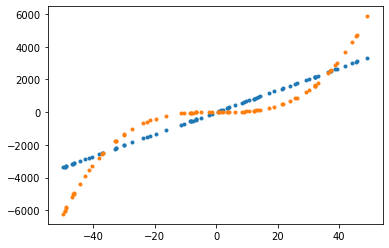

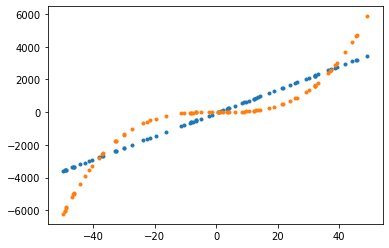

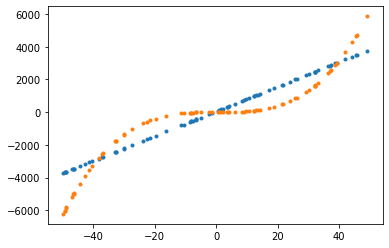

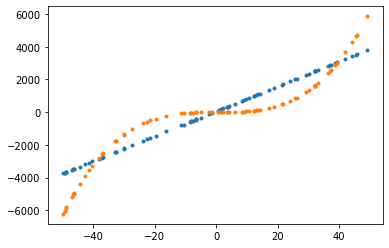

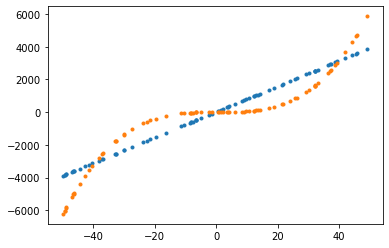

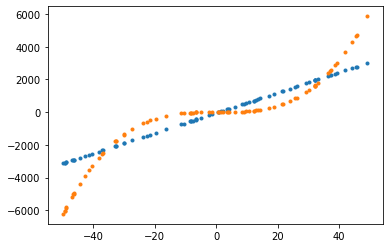

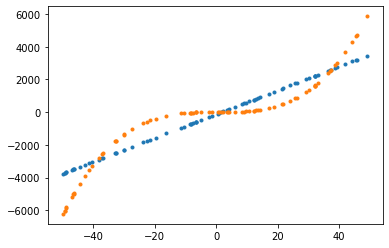

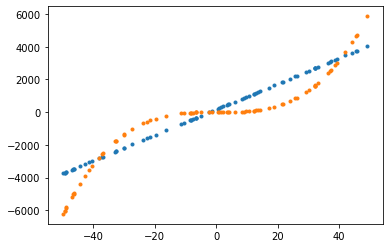

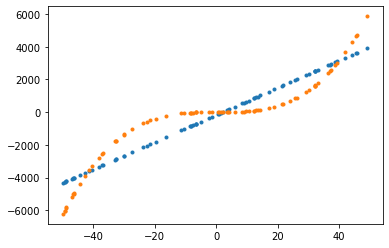

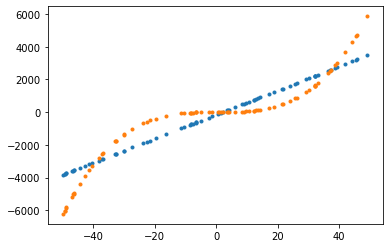

In [7]:
y_predict = []
for i in range (0,10):
    classifier[i].fit(x_train[i], y_train[i])
    y_predict.append(classifier[i].predict(x_test))
    plt.plot(x_test, y_predict[i], '.')
    plt.plot(x_test, y_test, '.')
    plt.show()

Here is the plot comparing the average predicted $y$ values with the test data values:

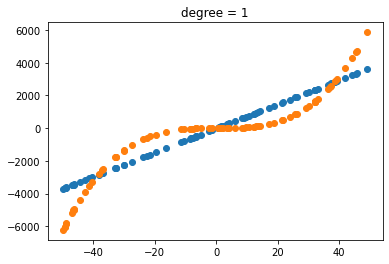

In [8]:
y_mean = np.mean(y_predict, axis=0)
plt.plot(x_test, y_mean, 'o')
plt.plot(x_test, y_test, 'o')
plt.title('degree = 1')
plt.show()

### Step 2
Calculate Bias$^2$ and Variance for the linear classifier

First define functions to calculate $bias^2$ and variance

In [9]:
def calc_bias2(y, y_mean):
    bias = np.array(y - y_mean)
    return np.mean(bias**2)

def calc_var(y_vec, y_mean):
    var = []
    for y in y_vec:
        var.append(np.mean((y - y_mean)**2))
    return np.mean(var)

and see the bias$^2$ and varaince of the predicted data

In [10]:
bias2 = calc_bias2(y_test, y_mean)
var = calc_var(y_predict, y_mean)
print(bias2, var)

1004739.6153645382 38342.71076858427


### Step 3
Repeat this for polynomials till degree 20

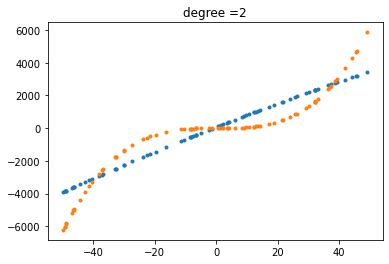

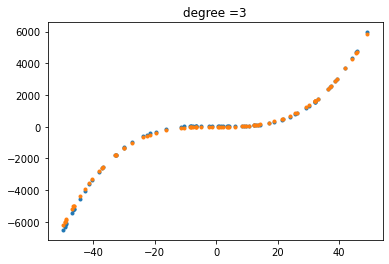

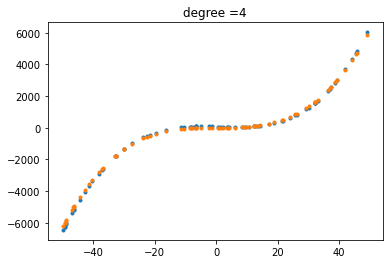

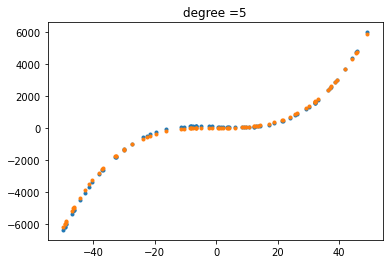

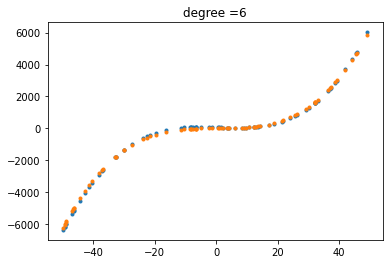

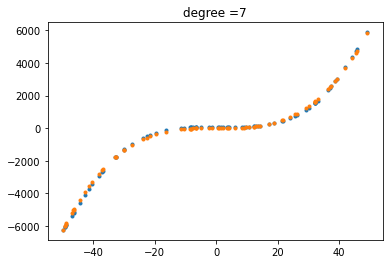

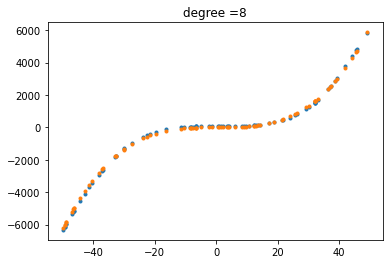

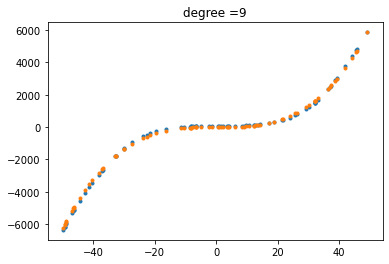

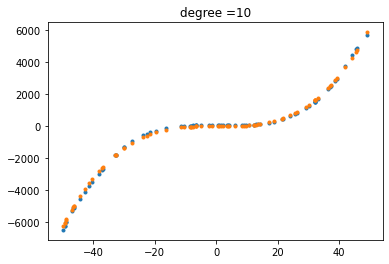

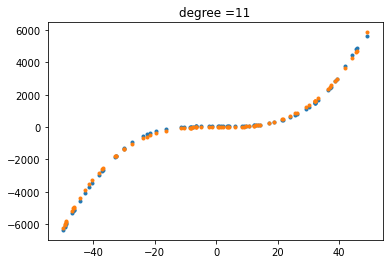

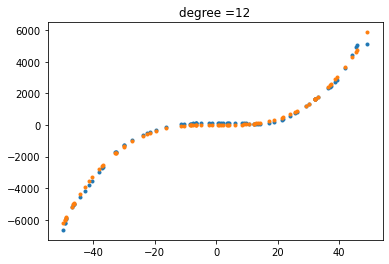

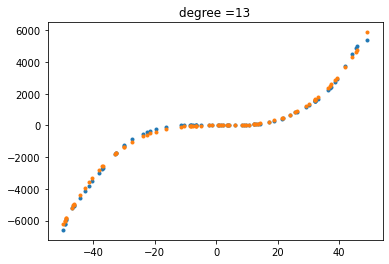

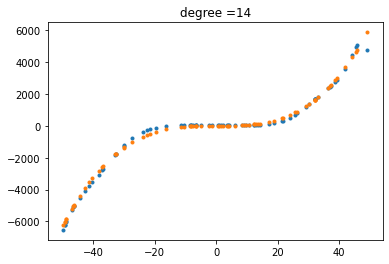

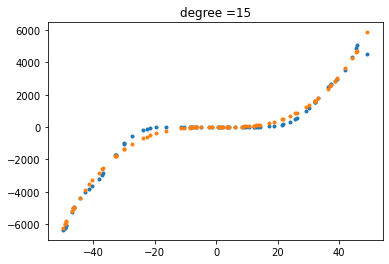

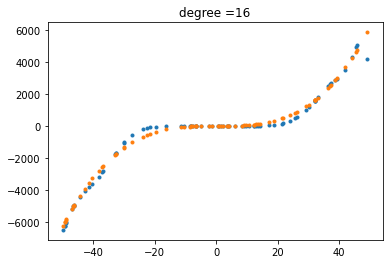

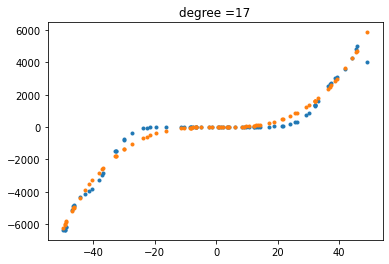

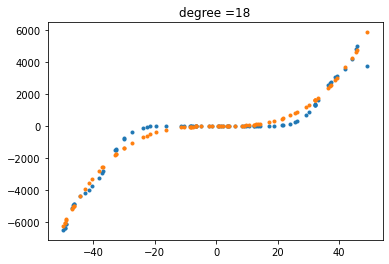

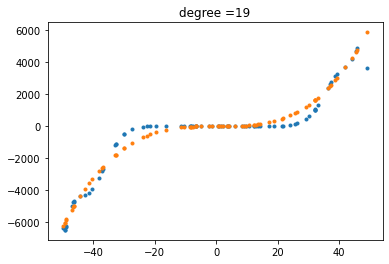

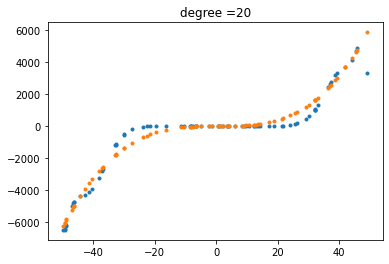

In [11]:
y_pred, y_m = [y_predict], [y_mean] # initialising the arrays with degree=1 values
# array index = deg - 1


for deg in range(2, 21):
    trans = [PolynomialFeatures(deg)]*10
    model = [LinearRegression()]*10
    y = []
    for i in range (0,10):
        x = trans[i].fit_transform(x_train[i])
        x_t = trans[i].transform(x_test)
        model[i].fit(x, y_train[i])
        y.append(model[i].predict(x_t))
    y_pred.append(y)
    y_m.append(np.mean(y, axis=0))
    plt.title('degree =' +str(deg))
    plt.plot(x_test, y_m[deg-1], '.')
    plt.plot(x_test, y_test, '.')
    plt.show()

Now we will store the bias$^2$ and variance values corresponding to each degree in arrays.

In [12]:
# initialise with bias^2 and variance of degree=1
bias_sq, variance = [bias2], [var]

for deg in range(2, 21):
    b2 = calc_bias2(y_test, y_m[deg-1])
    v = calc_var(y_pred[deg-1], y_m[deg-1])
    bias_sq.append(b2)
    variance.append(v)

### Step 4
Plot Bias$^2$ and Variance Values

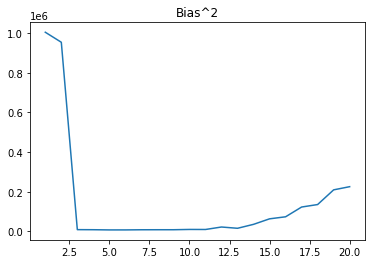

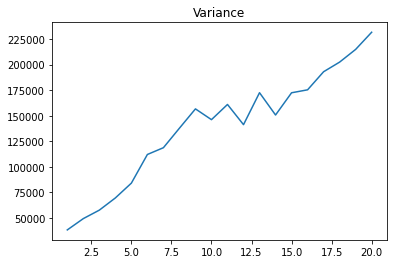

In [13]:
plt.plot(range(1, 21), bias_sq)
plt.title('Bias^2')
plt.show()
plt.plot(range(1, 21), variance)
plt.title('Variance')
plt.show()

### Step 5
Tabulate Bias and Variance Values

In [14]:
table = pd.DataFrame(np.array([np.sqrt(bias_sq), variance]).T)
table.columns = ['Bias', 'Variance']
table.index = range(1, 21)
table.round(3)

,Bias,Variance
1,1002.367,38342.711
2,976.842,49402.325
3,95.294,57686.915
4,93.400,69606.637
5,87.749,84091.408
6,87.956,112100.679
7,92.049,118728.980
8,92.810,137807.376
9,92.967,156679.727
10,100.504,146150.711


# Task 3
#### Calculating Irreducible Error

$$σ^2 = E[(f(x) − f'(x))^2] − (Bias^2 + Variance)$$ \
where $f(x)$ represents the true value, $f'(x)$ represents the predicted value,
$E[(f(x)−f(x))^2]$ is the mean squared error and $σ^2$ represents irreducible error.

### Step 1
Calculating Mean Squared Error

In [15]:
def meansq_error(y, y_cap):
    err = np.array(y) - np.array(y_cap)
    return (np.mean(err**2))

Now, just like bias$^2$ and variance, store Mean Squared Error values corresponding to each degree in arrays.

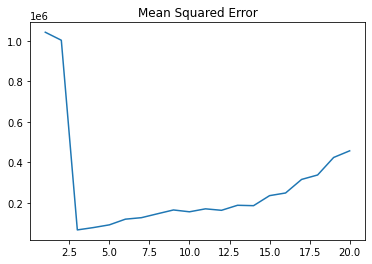

In [16]:
mse = []
for deg in range(1, 21):
    mse.append(meansq_error(y_test, y_pred[deg-1]))
    
plt.plot(range(1, 21), mse)
plt.title('Mean Squared Error')
plt.show()

### Step 2
Calculating irreducible error ($\sigma^2$) using Bias$^2$, Variance and Mean Squared Error

In [17]:
sigma_2 = np.array(mse) - (np.array(bias_sq) + np.array(variance))

In [18]:
table = pd.DataFrame(sigma_2)
table.columns = ['Irreducible error']
table.index = range(1, 21)
table

,Irreducible error
1,0.000000e+00
2,0.000000e+00
3,0.000000e+00
4,0.000000e+00
5,-1.455192e-11
6,-1.455192e-11
7,0.000000e+00
8,-2.910383e-11
9,0.000000e+00
10,-2.910383e-11


# Task 4
#### Plotting Bias$^2$ - Variance Graph

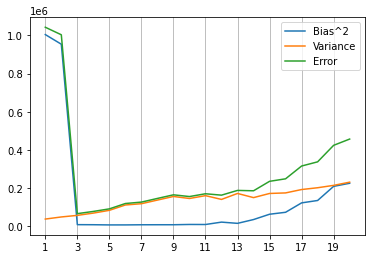

In [19]:
plt.plot(range(1, 21), bias_sq, label='Bias^2')
plt.plot(range(1, 21), variance, label = 'Variance')
plt.plot(range(1, 21), mse, label= 'Error')
plt.xticks(range(1, 21, 2))
plt.grid(axis='x')
plt.legend()
plt.show()